# Focusing specifically on G-quadruplexes in Flanking Regions

In [2]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('/home/alextu/scratch/extract_sv_flanks_2000bp/all_combined_quadron_results_SV_flanks.csv')

# Drop rows where the Q value is NA
df = df.dropna(subset=['Q'])

# 1. Total number of G quadruplexes (rows in the DataFrame after removing NA)
total_g4s = len(df)

# 2. Count stable and non-stable G quadruplexes based on the Q column
stable_count = df[df['Q'] > 19].shape[0]
non_stable_count = df[df['Q'] <= 19].shape[0]

# Print the results
print("Total number of G quadruplexes found in the flanks:", total_g4s)
print("Number of stable G quadruplexes (Q > 19):", stable_count)
print("Number of non-stable G quadruplexes (Q <= 19):", non_stable_count)

# 3. Aggregate by sample and sum the lengths
sample_aggregated = df.groupby('Sample').agg(Total_Length=('L', 'sum')).reset_index()

# Calculate the mean of the summed coverage values
mean_coverage = sample_aggregated['Total_Length'].mean()
print("\nMean of summed coverage values:", mean_coverage)

# 4. Categorize SVs into low, medium, and high non-B coverage based on total length
def categorize_coverage(length):
    if length <= 500:
        return 'Low Non-B Coverage (0-500)'
    elif 500 < length <= 1000:
        return 'Medium Non-B Coverage (500-1000)'
    elif length > 1000:
        return 'High Non-B Coverage (1000-2000)'

sample_aggregated['Coverage_Category'] = sample_aggregated['Total_Length'].apply(categorize_coverage)

# 5. Count the number of SVs in each category
coverage_counts = sample_aggregated['Coverage_Category'].value_counts()

# Print the categorized counts
print("\nCounts of SVs by Non-B Coverage Category:")
print(coverage_counts)

# Save the categorized results to a CSV file
output_file = '/home/alextu/scratch/aggregated_sv_coverage.csv'
sample_aggregated.to_csv(output_file, index=False)
print(f"\nAggregated SV coverage results saved to: {output_file}")

Total number of G quadruplexes found in the flanks: 4071740
Number of stable G quadruplexes (Q > 19): 2575079
Number of non-stable G quadruplexes (Q <= 19): 1496661

Mean of summed coverage values: 121.60677077579714

Counts of SVs by Non-B Coverage Category:
Coverage_Category
Low Non-B Coverage (0-500)          1433652
Medium Non-B Coverage (500-1000)      44531
High Non-B Coverage (1000-2000)       15442
Name: count, dtype: int64

Aggregated SV coverage results saved to: /home/alextu/scratch/aggregated_sv_coverage.csv


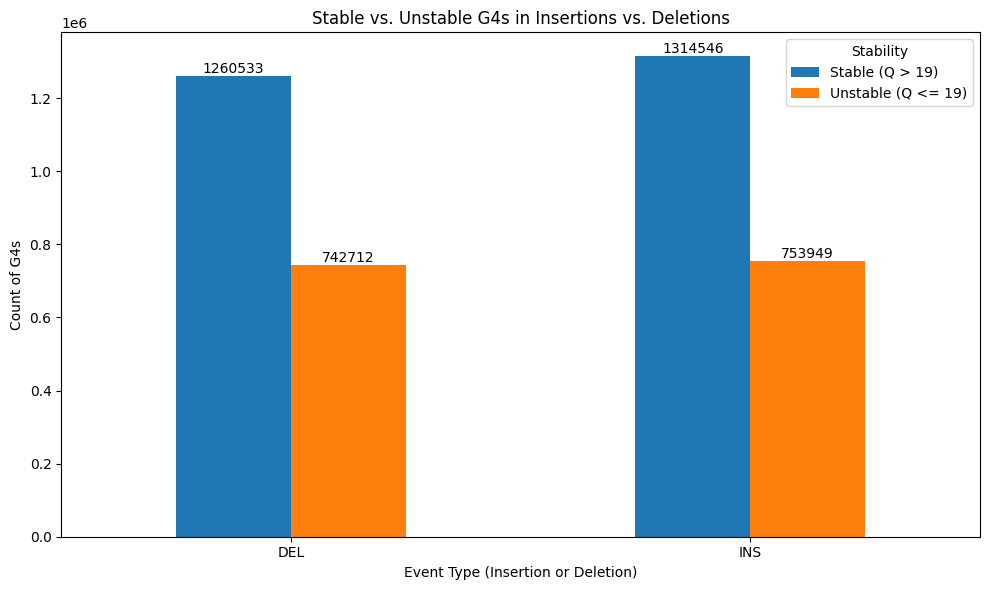

Mean length (L) of stable G4s: 48.32
Mean length (L) of unstable G4s: 38.22


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/home/alextu/scratch/extract_sv_flanks_2000bp/all_combined_quadron_results_SV_flanks.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Drop rows where the Q value is NA
df = df.dropna(subset=['Q'])

# Add a new column to categorize stability
df['Stability'] = df['Q'].apply(lambda x: 'Stable (Q > 19)' if x > 19 else 'Unstable (Q <= 19)')

# Extract event types from the file names (INS/DEL) for categorization
df['Event_Type'] = df['Sample'].str.extract(r'_(INS|DEL)_')[0]

# Count stable and unstable G4s by event type
stability_counts = df.groupby(['Event_Type', 'Stability']).size().unstack(fill_value=0)

# Plotting
ax = stability_counts.plot(kind='bar', figsize=(10, 6), stacked=False)
plt.title('Stable vs. Unstable G4s in Insertions vs. Deletions')
plt.xlabel('Event Type (Insertion or Deletion)')
plt.ylabel('Count of G4s')
plt.xticks(rotation=0)
plt.legend(title='Stability')
plt.tight_layout()

# Add counts to the bars
for i, bar_group in enumerate(ax.containers):
    for bar in bar_group:
        height = bar.get_height()
        if height > 0:
            ax.text(
                bar.get_x() + bar.get_width() / 2,  # x-coordinate
                height,  # y-coordinate
                f'{int(height)}',  # label text
                ha='center', va='bottom', fontsize=10  # alignment and style
            )

plt.show()

# Ensure L column is numeric
df['L'] = pd.to_numeric(df['L'], errors='coerce')

# Calculate mean length (L) for stable and unstable G4s
mean_length_stable = df[df['Stability'] == 'Stable (Q > 19)']['L'].mean()
mean_length_unstable = df[df['Stability'] == 'Unstable (Q <= 19)']['L'].mean()

# Print the results
print(f"Mean length (L) of stable G4s: {mean_length_stable:.2f}")
print(f"Mean length (L) of unstable G4s: {mean_length_unstable:.2f}")

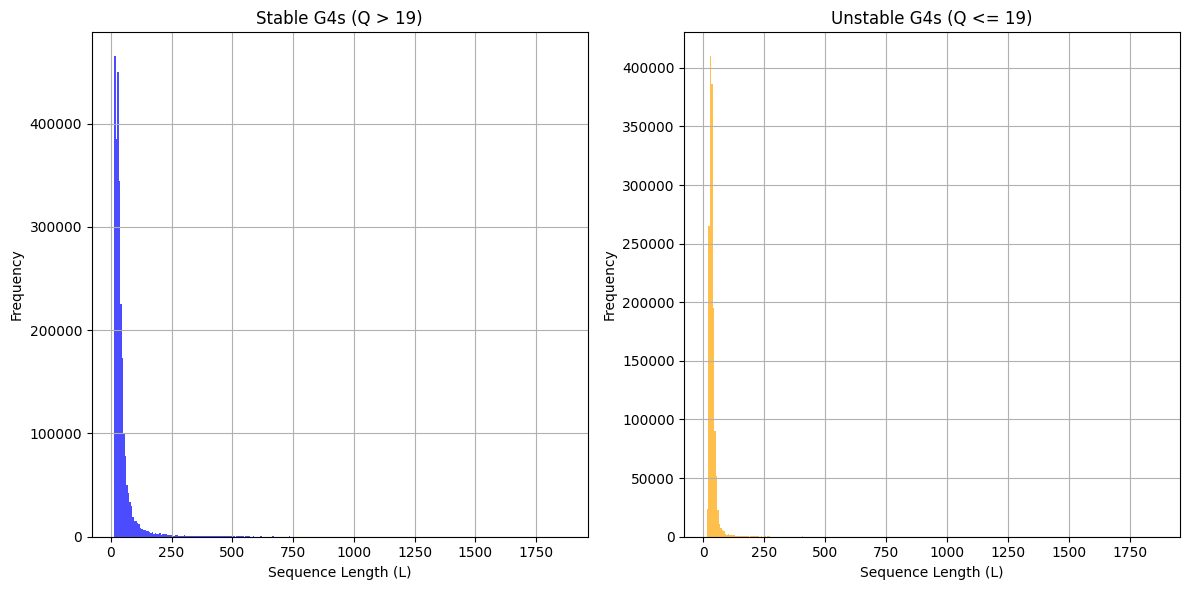

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/home/alextu/scratch/extract_sv_flanks_2000bp/all_combined_quadron_results_SV_flanks.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Drop rows where the Q value is NA
df = df.dropna(subset=['Q'])

# Add a new column to categorize stability
df['Stability'] = df['Q'].apply(lambda x: 'Stable (Q > 19)' if x > 19 else 'Unstable (Q <= 19)')

# Ensure L column is numeric
df['L'] = pd.to_numeric(df['L'], errors='coerce')

# Drop rows where L is NA or not numeric
df = df.dropna(subset=['L'])

# Separate data for stable and unstable G4s
stable_lengths = df[df['Stability'] == 'Stable (Q > 19)']['L']
unstable_lengths = df[df['Stability'] == 'Unstable (Q <= 19)']['L']

# Plot histograms separately
plt.figure(figsize=(12, 6))

# Stable G4s
plt.subplot(1, 2, 1)
plt.hist(stable_lengths, bins=300, alpha=0.7, color='blue')
plt.title('Stable G4s (Q > 19)')
plt.xlabel('Sequence Length (L)')
plt.ylabel('Frequency')
plt.grid(True)

# Unstable G4s
plt.subplot(1, 2, 2)
plt.hist(unstable_lengths, bins=300, alpha=0.7, color='orange')
plt.title('Unstable G4s (Q <= 19)')
plt.xlabel('Sequence Length (L)')
plt.ylabel('Frequency')
plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

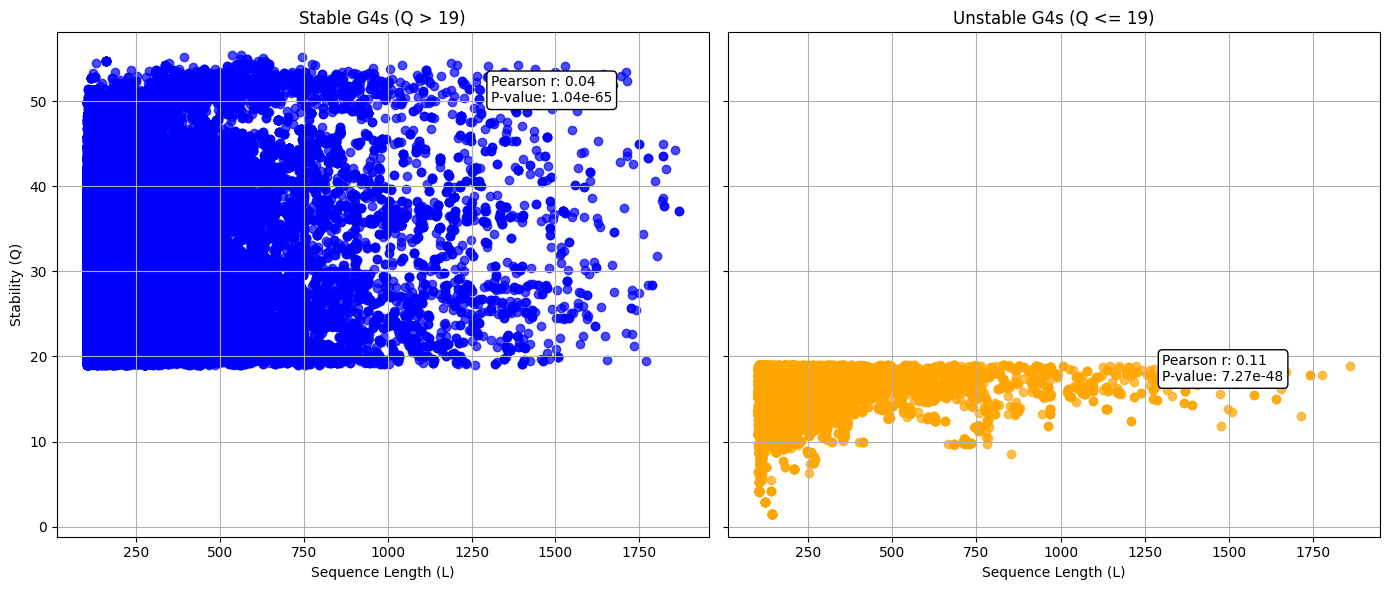

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the dataset
file_path = '/home/alextu/scratch/extract_sv_flanks_2000bp/all_combined_quadron_results_SV_flanks.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Drop rows where the Q value is NA
df = df.dropna(subset=['Q'])

# Ensure the L column is numeric (convert if necessary)
df['L'] = pd.to_numeric(df['L'], errors='coerce')

# Drop rows where L is NA or not numeric
df = df.dropna(subset=['L'])

# Separate stable and unstable G4s
stable_df = filtered_df[filtered_df['Q'] > 19]
unstable_df = filtered_df[filtered_df['Q'] <= 19]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Stable G4s plot
axs[0].scatter(stable_df['L'], stable_df['Q'], alpha=0.7, color='blue')
axs[0].set_title('Stable G4s (Q > 19)')
axs[0].set_xlabel('Sequence Length (L)')
axs[0].set_ylabel('Stability (Q)')
axs[0].grid(True)

# Unstable G4s plot
axs[1].scatter(unstable_df['L'], unstable_df['Q'], alpha=0.7, color='orange')
axs[1].set_title('Unstable G4s (Q <= 19)')
axs[1].set_xlabel('Sequence Length (L)')
axs[1].grid(True)

# Calculate and display Pearson correlation coefficients
stable_corr, stable_p = pearsonr(stable_df['L'], stable_df['Q'])
unstable_corr, unstable_p = pearsonr(unstable_df['L'], unstable_df['Q'])

axs[0].text(
    max(stable_df['L']) * 0.7, max(stable_df['Q']) * 0.9,
    f'Pearson r: {stable_corr:.2f}\nP-value: {stable_p:.2e}',
    fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
)
axs[1].text(
    max(unstable_df['L']) * 0.7, max(unstable_df['Q']) * 0.9,
    f'Pearson r: {unstable_corr:.2f}\nP-value: {unstable_p:.2e}',
    fontsize=10, bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.3')
)

plt.tight_layout()
plt.show()

# MEI Flanks

In [3]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
# Replace 'your_file.csv' with the actual file path
df = pd.read_csv('/home/alextu/scratch/mei_analysis/all_combined_quadron_results_MEI_flanks.csv')

# Drop rows where the Q value is NA
df = df.dropna(subset=['Q'])

# 1. Total number of G quadruplexes (rows in the DataFrame after removing NA)
total_g4s = len(df)

# 2. Count stable and non-stable G quadruplexes based on the Q column
stable_count = df[df['Q'] > 19].shape[0]
non_stable_count = df[df['Q'] <= 19].shape[0]

# Print the results
print("Total number of G quadruplexes found in the flanks:", total_g4s)
print("Number of stable G quadruplexes (Q > 19):", stable_count)
print("Number of non-stable G quadruplexes (Q <= 19):", non_stable_count)

Total number of G quadruplexes found in the flanks: 76510
Number of stable G quadruplexes (Q > 19): 37683
Number of non-stable G quadruplexes (Q <= 19): 38827
